# Vi börjar med att se hur målvariabeln Employed är fördelad.

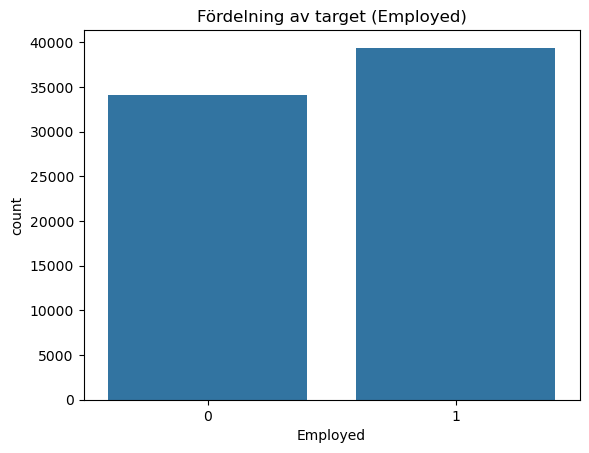

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv("stackoverflow_full.csv")

sns.countplot(x="Employed", data=df)
plt.title("Fördelning av target (Employed)")
plt.show()

# MentalHealth & Accessibility Korrelation med anställning.

In [6]:
print(df.groupby("MentalHealth")["Employed"].mean())
print(df.groupby("Accessibility")["Employed"].mean())

MentalHealth
No     0.530170
Yes    0.557089
Name: Employed, dtype: float64
Accessibility
No     0.535309
Yes    0.567157
Name: Employed, dtype: float64


# MainBranch (Dev vs NotDev) Kolla fördelning och anställningsgrad.

In [5]:
# MainBranch (Dev vs NotDev) Kolla fördelning och anställningsgrad.

MainBranch
Dev       0.917427
NotDev    0.082573
Name: proportion, dtype: float64
MainBranch
Dev       0.553089
NotDev    0.348830
Name: Employed, dtype: float64


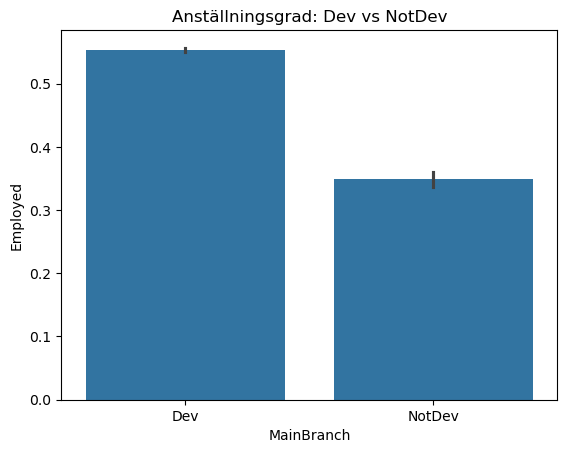

73462


In [11]:
print(df["MainBranch"].value_counts(normalize=True))
print(df.groupby("MainBranch")["Employed"].mean())
sns.barplot(x="MainBranch", y="Employed", data=df)
plt.title("Anställningsgrad: Dev vs NotDev")
plt.show()
print(df["MainBranch"].count())

# Se anställningsgrad per land och dominerande länder.

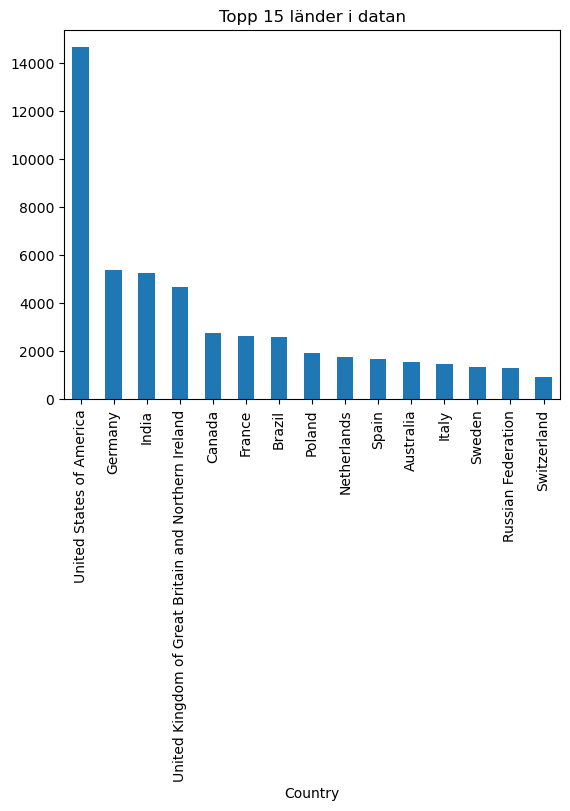

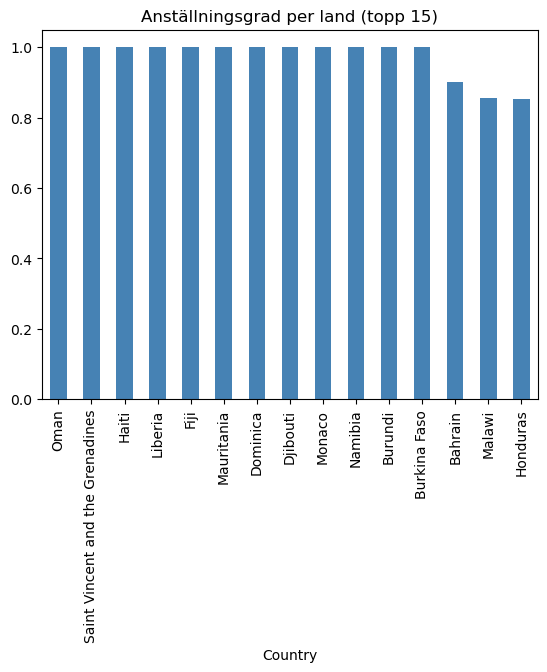

In [8]:
top_countries = df['Country'].value_counts().head(15)
top_countries.plot(kind='bar')
plt.title("Topp 15 länder i datan")
plt.show()

hire_by_country = df.groupby('Country')["Employed"].mean()
hire_by_country.sort_values(ascending=False).head(15).plot(kind='bar', color='steelblue')
plt.title("Anställningsgrad per land (topp 15)")
plt.show()


# YearsCode & YearsCodePro. Hur påverkar erfarenhet sannolikheten för anställning?

/var/folders/66/n7t02x9n3px6n956yn182btr0000gn/T/ipykernel_89396/2302712693.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(exp_bins)["Employed"].mean().plot(kind="bar")


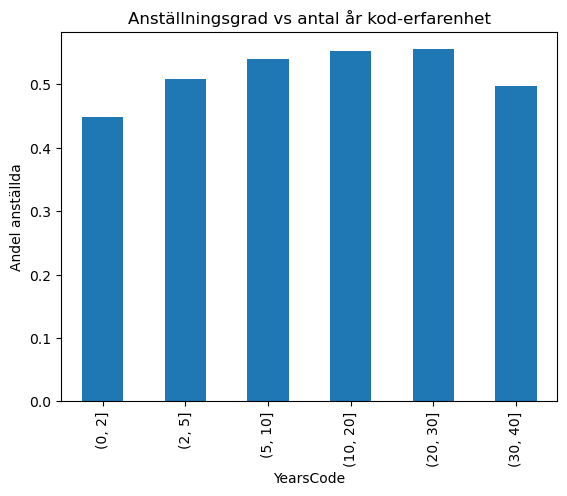

In [9]:
exp_bins = pd.cut(df["YearsCode"], bins=[0,2,5,10,20,30,40])
df.groupby(exp_bins)["Employed"].mean().plot(kind="bar")
plt.ylabel("Andel anställda")
plt.title("Anställningsgrad vs antal år kod-erfarenhet")
plt.show()


# PreviousSalary normaliserad per land. För att jämföra löner oberoende av valuta.

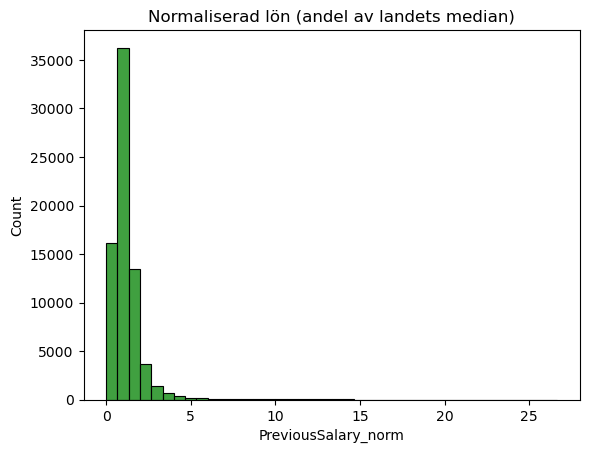

,PreviousSalary,PreviousSalary_norm
Country,,
Afghanistan,9792.0,1.0
Albania,15900.0,1.0
Algeria,8136.0,1.0
Andorra,75669.0,1.0
Angola,5256.0,1.0
Argentina,33462.0,1.0
Armenia,37620.0,1.0
Australia,84180.0,1.0
Austria,56521.0,1.0


In [11]:
sns.histplot(df["PreviousSalary_norm"], bins=40, color="green")
plt.title("Normaliserad lön (andel av landets median)")
plt.xlabel("PreviousSalary_norm")
plt.show()

df.groupby("Country")[["PreviousSalary", "PreviousSalary_norm"]].median().head(10)



# Antal tekniska skills (ComputerSkills) Samband mellan antal rapporterade färdigheter och anställning.

/var/folders/66/n7t02x9n3px6n956yn182btr0000gn/T/ipykernel_89396/2679016339.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(skill_bins)["Employed"].mean().plot(kind="bar", color="orange")


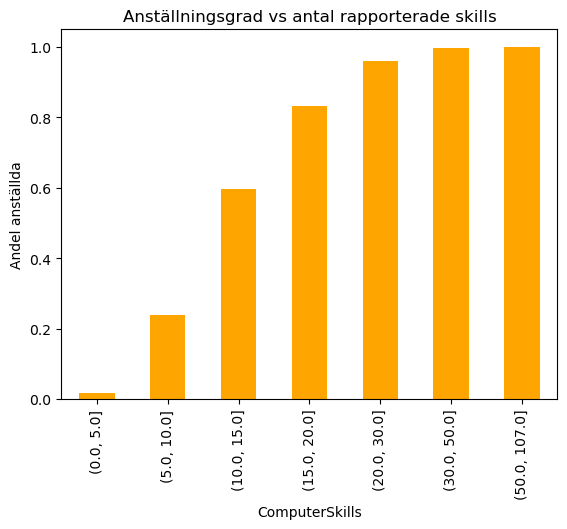

In [12]:
skill_bins = pd.cut(df["ComputerSkills"],
                    bins=[0,5,10,15,20,30,50,df["ComputerSkills"].max()])
df.groupby(skill_bins)["Employed"].mean().plot(kind="bar", color="orange")
plt.title("Anställningsgrad vs antal rapporterade skills")
plt.ylabel("Andel anställda")
plt.show()


# Korrelationer & dubbla variabler Kolla korskorrelation för risk för dubbelräkning.


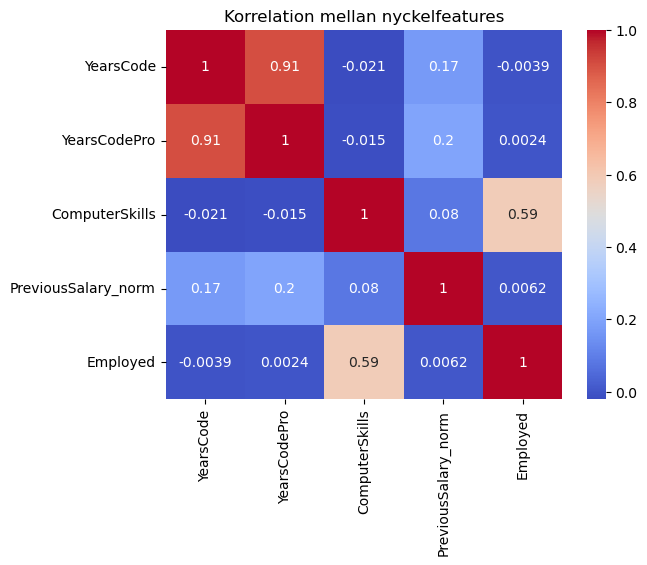

In [13]:
sns.heatmap(df[["YearsCode","YearsCodePro","ComputerSkills","PreviousSalary_norm","Employed"]].corr(),
            annot=True, cmap="coolwarm")
plt.title("Korrelation mellan nyckelfeatures")
plt.show()
